In [203]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.transforms as mtransforms


from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from keras.models import load_model
from keras.callbacks import EarlyStopping

from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(11)


In [204]:
# load  dataset
dataset = pd.read_csv('/home/francovm/Projects/SSE/data/processed/input_data.csv', sep='\t', encoding='utf-8')
# dataset = dataset.drop(dataset.columns[[1, 3, 5]], axis=1) 
dataset.columns = ['x','n','u','y']


# Shift

In [237]:
shift_by = -20
vector = dataset['y'].copy()
df = dataset.copy()

In [238]:

tmp = vector.shift(shift_by)
tmp = tmp.fillna(0)
labelcol = 'y'  

# Add vector to the df

df[labelcol+'tmp'] = tmp.values

# Remove the rows with labelcol == 1.
df = df.drop(df[df[labelcol] == 1.].index)

# Drop labelcol and rename the tmp col as labelcol
df = df.drop(labelcol, axis=1)
df = df.rename(columns={labelcol+'tmp': labelcol})

# Make the labelcol binary
df.loc[df[labelcol] > 0., labelcol] = 1.
df = df.reset_index(drop=True)


# PLot 

It does not show the true values of 'Events'

[]

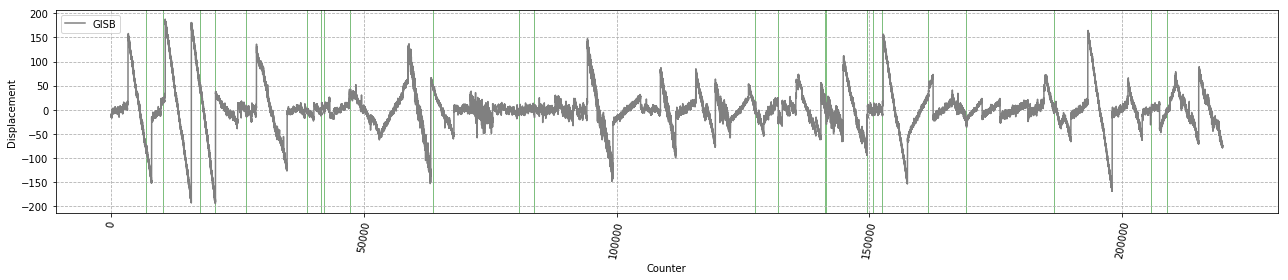

In [239]:
fig, ax = plt.subplots()

plt.plot(df['x'],'-', color='gray',label="GISB")

plt.legend(loc=2)
plt.xticks( rotation= 80 )

    # Grids
plt.gca().xaxis.grid(True, linestyle='--')
plt.gca().yaxis.grid(True, linestyle='--')

plt.xlabel('Counter')
plt.ylabel('Displacement')
# if (dataset_test['Events'] == 0.5): plt.axhline()
    
    # Get current size
fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size



trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.5
ax.fill_between(range(len(df['y'])), min(df['y']), max(df['y']), where=(df['y'] > 0.), 
                facecolor='green',
                alpha=0.5, transform=trans) 

# plt.show()

plt.tight_layout()
plt.plot()

In [240]:
# print(df.to_string())

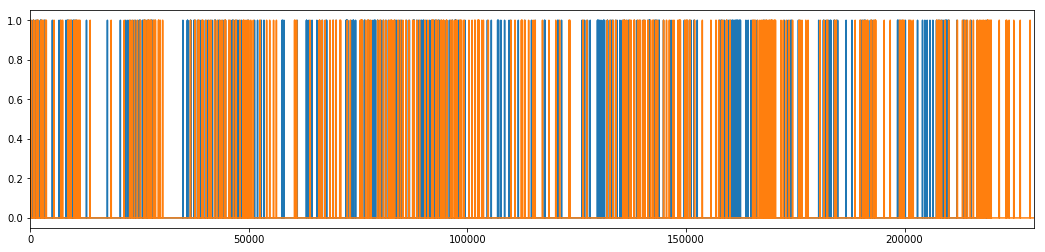

In [264]:
ax = df['y'].plot()
dataset['y'].plot(ax=ax)


In [162]:
# df.to_csv('input_data_shift.csv', sep='\t', encoding='utf-8',index=False)

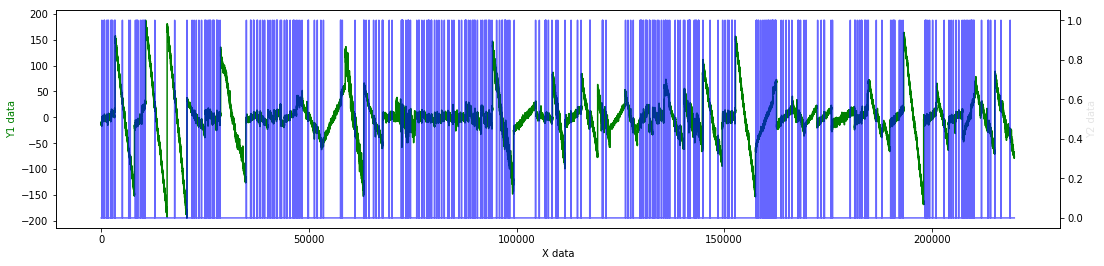

In [262]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.index, df['x'], 'g-')
ax2.plot(df.index, df['y'], 'b-',alpha=0.6)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data')
ax2.set_ylabel('Y2 data')

plt.show()

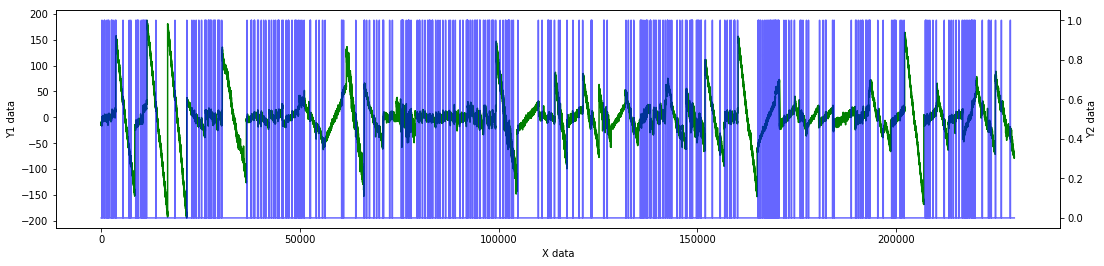

In [263]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dataset.index, dataset['x'], 'g-')
ax2.plot(dataset.index, dataset['y'], 'b-',alpha=0.6)

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data')
ax2.set_ylabel('Y2 data')

plt.show()